In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

In [2]:
X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    class_sep=2,
    random_state=1,
)

In [3]:
pd.DataFrame(X).head()

,0,1
0,1.863411,0.087646
1,-1.530997,1.901182
2,-0.017224,-2.591112
3,-2.032039,-1.801162
4,4.620555,0.901124


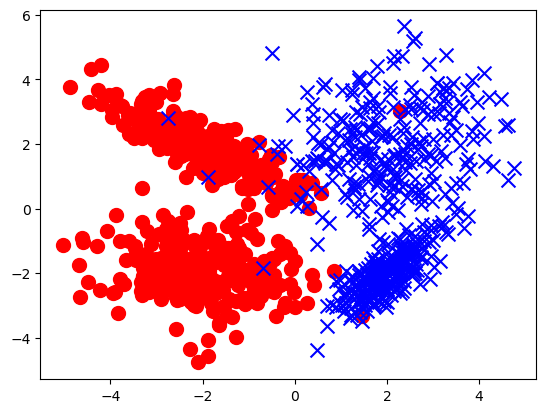

In [13]:
plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0], marker="o", c="r", s=100)
plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1], marker="x", c="b", s=100)
plt.show()

In [14]:
class SGD:
    def __init__(self, alpha=0.5, n_iters=1000):
        self.b = None
        self._alpha = alpha
        self._n_iters = n_iters

    def gradient_step(self, b, b_grad):
        return b - self._alpha * b_grad

    def optimize(self, X, y, start_b, n_iters):
        b = start_b.copy()
        for i in range(n_iters):
            b_grad = self.grad_func(X, y, b)
            b = self.gradient_step(b, b_grad)
        return b

    def fit(self, X, y):
        m = X.shape[1]
        start_b = np.ones(m)
        self.b = self.optimize(X, y, start_b, self._n_iters)

In [17]:
class LogReg(SGD):
    def sigmoid(self, X, b):
        return 1.0 / (1.0 + np.exp(-X.dot(b)))

    def grad_func(self, X, y, b):
        n = X.shape[0]
        grad = 1.0 / n * X.transpose().dot(self.sigmoid(X, b) - y)
        return grad

    def predict_proba(self, X):
        return self.sigmoid(X, self.b)

    def predict(self, X):
        y_pred = self.predict_proba(X) > 0.5
        return y_pred

In [96]:
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])

In [20]:
logreg = LogReg()
logreg.fit(X, y)
y_pred = logreg.predict(X)

In [23]:
ac = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(f"accuracy = {ac:.2f} F1-score = {f1:.2f}")

accuracy = 0.98 F1-score = 0.98


In [53]:
xx, yy = np.meshgrid(
    np.arange(X.min(axis=0)[1] - 1, X.max(axis=0)[1] + 1, 0.01),
    np.arange(X.min(axis=0)[2] - 1, X.max(axis=0)[2] + 1, 0.01),
)
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
XX = np.array([(1, *xx) for xx in XX])

In [54]:
Z = logreg.predict_proba(XX)
Z = Z.reshape(xx.shape)

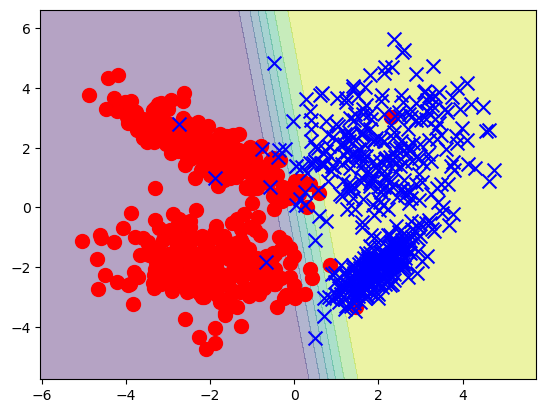

In [55]:
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 1][y == 0], X[:, 2][y == 0], marker="o", c="r", s=100)
plt.scatter(X[:, 1][y == 1], X[:, 2][y == 1], marker="x", c="b", s=100)

In [56]:
model = LogisticRegression()
model.fit(X, y)
y_pred_lr = model.predict(X)

accuracy = 0.98 F1-score = 0.98


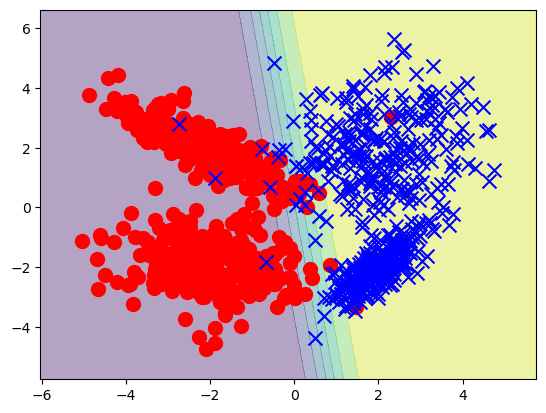

In [57]:
# 1

ac = accuracy_score(y, y_pred_lr)
f1 = f1_score(y, y_pred_lr)
print(f"accuracy = {ac:.2f} F1-score = {f1:.2f}")

Z = model.predict_proba(XX)
Z = Z[:, 1].reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 1][y == 0], X[:, 2][y == 0], marker="o", c="r", s=100)
plt.scatter(X[:, 1][y == 1], X[:, 2][y == 1], marker="x", c="b", s=100)

In [5]:
# 2

model = LogisticRegression()
model.fit(X, y)
y_pred_lr = model.predict(X)
ac = accuracy_score(y, y_pred_lr)
f1 = f1_score(y, y_pred_lr)
print(f"accuracy = {ac:.2f} F1-score = {f1:.2f}")

accuracy = 0.98 F1-score = 0.98


accuracy = 0.97 F1-score = 0.97
accuracy = 0.73 F1-score = 0.77


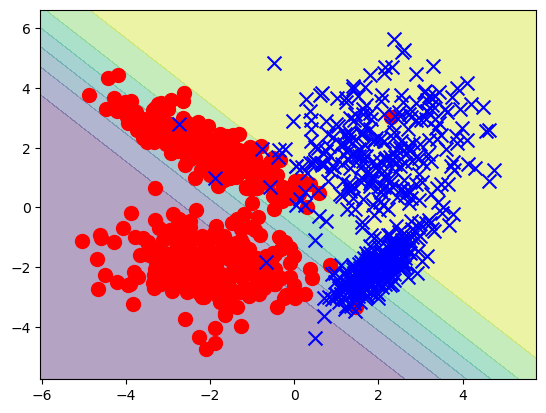

In [89]:
# 2

logreg = LogReg(alpha=1e-2)
logreg.fit(X, y)
y_pred = logreg.predict(X)
ac = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(f"accuracy = {ac:.2f} F1-score = {f1:.2f}")

logreg = LogReg(alpha=1e-4)
logreg.fit(X, y)
y_pred = logreg.predict(X)
ac = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(f"accuracy = {ac:.2f} F1-score = {f1:.2f}")
Z = logreg.predict_proba(XX)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 1][y == 0], X[:, 2][y == 0], marker="o", c="r", s=100)
plt.scatter(X[:, 1][y == 1], X[:, 2][y == 1], marker="x", c="b", s=100)

In [97]:
# 3


class SGD:
    def __init__(self, alpha=0.5, n_iters=1000):
        self.b = None
        self._alpha = alpha
        self._n_iters = n_iters

    def gradient_step(self, b, b_grad):
        return b - self._alpha * b_grad

    def optimize(self, X, y, start_b, n_iters):
        b = start_b.copy()
        for i in range(n_iters):
            b_grad = self.grad_func(X, y, b)
            b = self.gradient_step(b, b_grad)
        return b

    def fit(self, X, y):
        X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
        m = X.shape[1]
        start_b = np.ones(m)
        self.b = self.optimize(X, y, start_b, self._n_iters)


class LogReg(SGD):
    def sigmoid(self, X, b):
        return 1.0 / (1.0 + np.exp(-X.dot(b)))

    def grad_func(self, X, y, b):
        n = X.shape[0]
        grad = 1.0 / n * X.transpose().dot(self.sigmoid(X, b) - y)
        return grad

    def predict_proba(self, X):
        return self.sigmoid(X, self.b)

    def predict(self, X):
        X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
        y_pred = self.predict_proba(X) > 0.5
        return y_pred


X = np.delete(X, 0, axis=1)
logreg = LogReg()
logreg.fit(X, y)
y_pred = logreg.predict(X)
ac = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(f"accuracy = {ac:.2f} F1-score = {f1:.2f}")

accuracy = 0.98 F1-score = 0.98


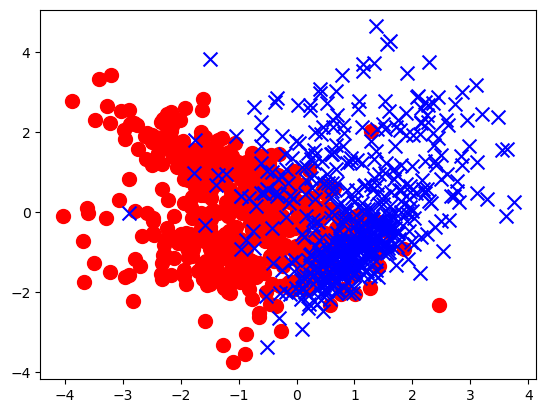

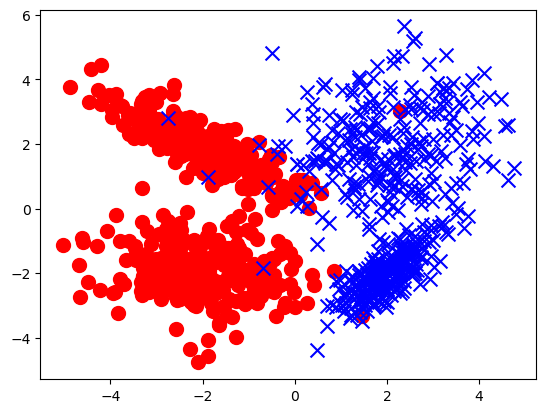

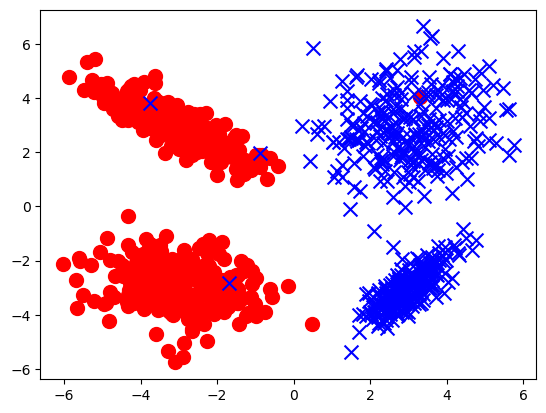

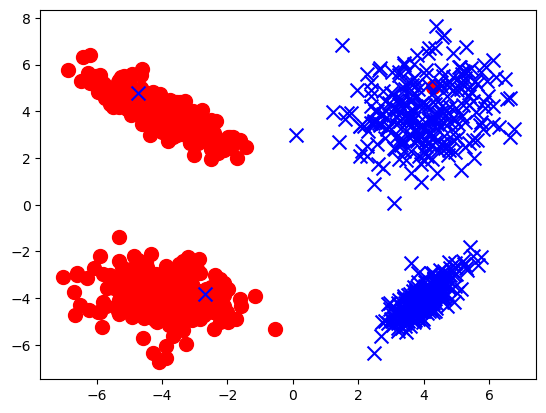

In [103]:
# 4

for class_sep in range(1, 5):
    X, y = make_classification(
        n_samples=1000,
        n_features=2,
        n_informative=2,
        n_redundant=0,
        n_classes=2,
        class_sep=class_sep,
        random_state=1,
    )
    plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0], marker="o", c="r", s=100)
    plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1], marker="x", c="b", s=100)
    plt.show()

In [106]:
# 5

X, y = make_classification(
    n_samples=1000,
    n_features=100,
    n_informative=100,
    n_redundant=0,
    n_classes=2,
    class_sep=class_sep,
    random_state=1,
)

logreg = LogReg()
logreg.fit(X, y)
y_pred = logreg.predict(X)
ac = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(f"accuracy = {ac:.2f} F1-score = {f1:.2f}")

accuracy = 1.00 F1-score = 1.00


In [138]:
# 6


class OneVsAll:
    def __init__(self, alpha=0.5, n_iters=1000):
        self.models = []
        self._alpha = alpha
        self._n_iters = n_iters

    def fit(self, X, y):
        for c in np.unique(y):
            y_binary = (y == c).astype(int)
            model = LogisticRegression()
            model.fit(X, y_binary)
            self.models.append(model)

    def predict_proba(self, X):
        probas = []
        for model in self.models:
            proba = model.predict_proba(X)[:, 1]
            probas.append(proba)
        probas = np.array(probas).T

        return probas / probas.sum(axis=1, keepdims=True)

    def predict(self, X):
        y_pred_proba = self.predict_proba(X)
        y_pred = np.argmax(y_pred_proba, axis=1)
        return y_pred


X, y = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=10,
    n_redundant=0,
    n_classes=20,
    random_state=1,
)


one_vs_all = OneVsAll()
one_vs_all.fit(X, y)
y_pred = one_vs_all.predict(X)
ac = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred, average="micro")
print(f"accuracy = {ac:.2f} F1-score = {f1:.2f}")

accuracy = 0.29 F1-score = 0.29


[[3.76134350e-03 9.96238656e-01]
 [9.86150956e-01 1.38490435e-02]
 [7.93291865e-01 2.06708135e-01]
 ...
 [1.38915208e-04 9.99861085e-01]
 [9.97398412e-01 2.60158762e-03]
 [9.96372825e-01 3.62717529e-03]]


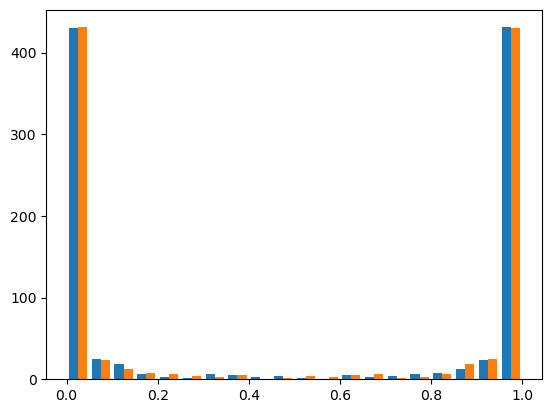

In [15]:
## 7

model = LogisticRegression()
model.fit(X, y)
probas = model.predict_proba(X)
print(probas)
plt.hist(probas, bins=20)
plt.show()